In [4]:
import pandas as pd

data = pd.read_clipboard()

EmptyDataError: No columns to parse from file

<AxesSubplot:>

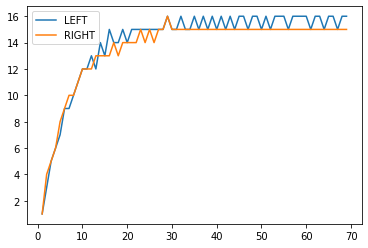

In [10]:
data[:70].diff().plot()

In [17]:
data_track = pd.read_clipboard(", ")
data_track

,LEFT,RIGHT
0,0,0
1,1,1
2,2,1
3,2,1
4,3,1
...,...,...
95,706,548
96,718,558
97,730,569
98,741,580


<AxesSubplot:>

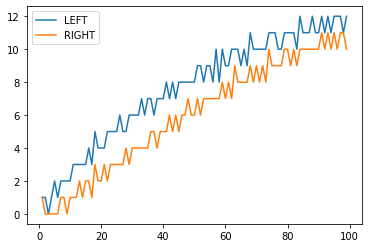

In [18]:
data_track.diff().plot()

In [19]:
data_complete = pd.read_clipboard()
data_complete

,"LEFT,",RIGHT
0,0,0
1,1,0
2,1,1
3,2,1
4,2,1
...,...,...
395,1526,1450
396,1526,1450
397,1526,1450
398,1526,1450


In [1]:
data_complete[200:280].plot()

NameError: name 'data_complete' is not defined